In [10]:
import pybinding as pb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import Collection
from matplotlib.artist import allow_rasterization

pb.pltutils.use_style()


%matplotlib inline


# Lattice

A [`Lattice`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice) object describes the unit cell of a crystal lattice. This includes the primitive vectors, positions of sublattice sites and hopping parameters which connect those sites. All of this structural information is used to build up a larger system by translation.

[Download this page as a Jupyter notebook](http://docs.pybinding.site/page/_downloads/lattice1.ipynb)

## Square lattice

Starting from the basics, we'll create a simple square lattice.

In [8]:
import pybinding as pb

d = 0.2  # [nm] unit cell length
t = 1    # [eV] hopping energy

# create a simple 2D lattice with vectors a1 and a2
lattice = pb.Lattice(a1=[d, 0], a2=[0, d])
lattice.add_sublattices(
    ('A', [0, 0])  # add an atom called 'A' at position [0, 0]
)
lattice.add_hoppings(
    # (relative_index, from_sublattice, to_sublattice, energy)
    ([0, 1], 'A', 'A', t),
    ([1, 0], 'A', 'A', t)
)

It may not be immediately obvious what this code does. Fortunately, [`Lattice`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice) objects have a convenient [`Lattice.plot()`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice.plot) method to easily visualize the constructed lattice.

ImportError: cannot import name 'allow_rasterization'

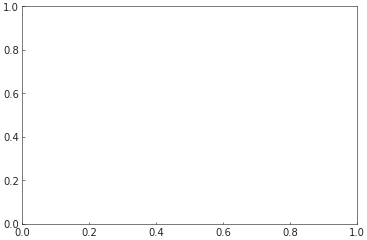

In [11]:
lattice.plot()  # plot the lattice that was just constructed
plt.show()      # standard matplotlib show() function

In the figure we see lattice vectors $a_1$ and $a_2$ which were used to initialize [`Lattice`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice). These vectors describe a Bravais lattice with an infinite set of positions,

$$
\vec{R} = n_1 \vec{a}_1 + n_2 \vec{a}_2,
$$

where $n_1$ and $n_2$ are integers. The blue circle labeled A represents the atom which was created with the [`Lattice.add_sublattices()`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice.add_sublattices) method. The slightly faded out circles represent translations of the lattice in the primitive vector directions, i.e. using the integer index $[n_1, n_2]$.

The hoppings are specified using the [`Lattice.add_hoppings()`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice.add_hoppings) method and each one consists of `(relative_index, from_sublattice, to_sublattice, energy)`:

* The main cell always has the index $[n_1, n_2]$ = [0, 0]. The `relative_index` represents the number of integer steps needed to reach another cell starting from the main one. Each cell is labeled with its `relative_index`, as seen in the figure.
  
* A hopping is created between the main cell and a neighboring cell specified by `relative_index`. Two hoppings are added in the definition: [0, 1] and [1, 0]. The opposite hoppings [0, -1] and [-1, 0] are added automatically to maintain hermiticity.
  
* This lattice consists of only one sublattice so the `from` and `to` sublattice fields are trivial. Generally, `from_sublattice` indicates the sublattice in the [0, 0] cell and `to_sublattice` in the neighboring cell. This will be explained further in the next example.
  
* The last parameter is simply the value of the hopping energy.
  
It's good practice to build the lattice inside a function to make it easily reusable. Here we define the same lattice as before, but note that the unit cell length and hopping energy are function arguments, which makes the lattice easily configurable.

In [ ]:
def square_lattice(d, t):
    lat = pb.Lattice(a1=[d, 0], a2=[0, d])
    lat.add_sublattices(('A', [0, 0]))
    lat.add_hoppings(([0, 1], 'A', 'A', t),
                     ([1, 0], 'A', 'A', t))
    return lat

# we can quickly set a shorter unit length `d`
lattice = square_lattice(d=0.1, t=1)
lattice.plot()
plt.show()

## Graphene

The next example shows a slightly more complicated two-atom lattice of graphene.

In [ ]:
from math import sqrt

def monolayer_graphene():
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    lat = pb.Lattice(a1=[a, 0],
                     a2=[a/2, a/2 * sqrt(3)])
    lat.add_sublattices(('A', [0, -a_cc/2]),
                        ('B', [0,  a_cc/2]))
    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )
    return lat

lattice = monolayer_graphene()
lattice.plot()
plt.show()

The [`Lattice.add_sublattices()`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice.add_sublattices) method creates atoms A and B (blue and orange) at different offsets: $[0, -a_{cc}/2]$ and $[0, a_{cc}/2]$. Once again, the translated cells are given at positions $\vec{R} = n_1 \vec{a}_1 + n_2 \vec{a}_2$, however, this time the lattice vectors are not perpendicular which makes the integer indices $[n_1, n_2]$ slightly more complicate (see the labels in the figure).

The hoppings are defined as follows:

* `([0,  0], 'A', 'B', t)` specifies the hopping inside the main cell, from atom A to B. The main [0,0] cell is never labeled in the figure, but it is always the central cell where the lattice vectors originate.
  
* `([1, -1], 'A', 'B', t)` specifies the hopping between [0, 0] and [1, -1], from A to B. The opposite hopping is added automatically: [-1, 1], from B to A. In the tight-binding matrix representation, the opposite hopping is the Hermitian conjugate of the first one. The lattice specification always requires explicitly mentioning only one half of the hoppings while the other half is automatically added to guarantee hermiticity.
  
* `([0, -1], 'A', 'B', t)` is handled in the very same way.
  
The [`Lattice.plot()`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice.plot) method will always faithfully draw any lattice that has been specified. It serves as a handy visual inspection tool.

## Brillouin zone

The method [`Lattice.plot_brillouin_zone()`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice.plot_brillouin_zone) is another handy tool that does just as its name implies.

In [ ]:
lattice = monolayer_graphene()
lattice.plot_brillouin_zone()

The reciprocal lattice vectors $b_1$ and $b_2$ are calculated automatically based on the real space vectors. There is no need to specify them manually. The first Brillouin zone is determined as the Wigner–Seitz cell in reciprocal space. By default, the plot method labels the vertices of the Brillouin zone.

## Material repository

A few common lattices are included in pybinding's [Material Repository](http://docs.pybinding.site/page/tutorial/../materials/index.html). You can get started quickly by importing one of them. For example:

In [ ]:
from pybinding.repository import graphene
lattice = graphene.bilayer()
lattice.plot()

## Further reading

Additional features of the [`Lattice`](http://docs.pybinding.site/page/tutorial/../_api/pybinding.Lattice.html#pybinding.Lattice) class are explained in the [Advanced Topics](http://docs.pybinding.site/page/tutorial/../advanced/lattice.html) section. For more lattice specifications check out the [examples section](http://docs.pybinding.site/page/tutorial/../examples/lattice/index.html).

## Example

This is a full example file which you can download and run with `python3 lattice_example.py`.

[Download source code](http://docs.pybinding.site/page/_downloads/lattice_example.py)

In [ ]:
"""Create and plot a monolayer graphene lattice and it's Brillouin zone"""
import pybinding as pb
import matplotlib.pyplot as plt
from math import sqrt

pb.pltutils.use_style()


def monolayer_graphene():
    """Return the lattice specification for monolayer graphene"""
    a = 0.24595   # [nm] unit cell length
    a_cc = 0.142  # [nm] carbon-carbon distance
    t = -2.8      # [eV] nearest neighbour hopping

    # create a lattice with 2 primitive vectors
    lat = pb.Lattice(
        a1=[a, 0],
        a2=[a/2, a/2 * sqrt(3)]
    )

    lat.add_sublattices(
        # name and position
        ('A', [0, -a_cc/2]),
        ('B', [0,  a_cc/2])
    )

    lat.add_hoppings(
        # inside the main cell
        ([0,  0], 'A', 'B', t),
        # between neighboring cells
        ([1, -1], 'A', 'B', t),
        ([0, -1], 'A', 'B', t)
    )

    return lat


lattice = monolayer_graphene()
lattice.plot()
plt.show()

In [ ]:
lattice.plot_brillouin_zone()
plt.show()